## Introduction to the Data Set

Over the past two missions, we learned about how decision trees are constructed. We used a modified version of ID3, which is a bit simpler than the most common tree building algorithms, C4.5 and CART. The basics are the same, however, so we can apply what we learned about how decision trees work to any tree construction algorithm.

In this mission, we'll learn about when to use decision trees, and how to use them most effectively.

## Using Decision Trees With scikit-learn

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn import set_config
import pandas as pd
import numpy
import math
set_config(print_changed_only=False)

In [3]:
income = pd.read_csv('income.csv')

In [9]:
columns = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

for col in columns:
    income[col] = pd.Categorical(income[col]).codes

In [13]:
income['high_income'] = pd.Categorical(income['high_income']).codes

In [15]:
clf = DecisionTreeClassifier(random_state=1)

clf.fit(income[columns], income['high_income'])

DecisionTreeClassifier(random_state=1)

## Splitting the Data into Train and Test Sets

In [17]:
# Set a random seed so the shuffle is the same every time
numpy.random.seed(1)

# Shuffle the rows  
# This permutes the index randomly using numpy.random.permutation
# Then, it reindexes the dataframe with the result
# The net effect is to put the rows into random order
income = income.reindex(numpy.random.permutation(income.index))

train_max_row = math.floor(income.shape[0] * .8)

train = income[:train_max_row]
test = income[train_max_row:]

## Evaluating Error With AUC

In [19]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train["high_income"])

predictions = clf.predict(test[columns])

error = roc_auc_score(test['high_income'], predictions)
error

0.6935681755427078

## Computing Error on the Training Set

In [20]:
predictions = clf.predict(train[columns])

print(roc_auc_score(train['high_income'], predictions))

0.9471244501437455


[Text(195.76225826792313, 214.5016216216216, 'X[5] <= 0.5\ngini = 0.363\nsamples = 26048\nvalue = [19844, 6204]'),
 Text(96.98596569683431, 208.62486486486486, 'X[2] <= 11.5\ngini = 0.494\nsamples = 10517\nvalue = [5823, 4694]'),
 Text(32.06890401420517, 202.7481081081081, 'X[2] <= 7.5\ngini = 0.44\nsamples = 7337\nvalue = [4936, 2401]'),
 Text(5.86375268542713, 196.87135135135134, 'X[0] <= 18.5\ngini = 0.209\nsamples = 1206\nvalue = [1063, 143]'),
 Text(2.015349887133183, 190.9945945945946, 'X[4] <= 11.5\ngini = 0.101\nsamples = 299\nvalue = [283, 16]'),
 Text(1.1011441568834417, 185.11783783783784, 'X[8] <= 48.0\ngini = 0.075\nsamples = 255\nvalue = [245, 10]'),
 Text(0.3994848569158533, 179.24108108108106, 'X[9] <= 1.0\ngini = 0.046\nsamples = 212\nvalue = [207, 5]'),
 Text(0.16389122335009365, 173.36432432432431, 'X[0] <= 15.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.08194561167504683, 167.48756756756757, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2458368350251

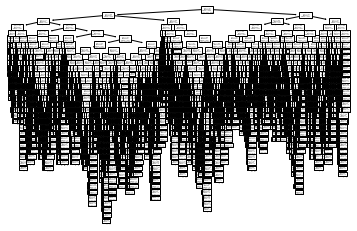

In [25]:
# visualize the model
with open("allElectronicInformation.dot", "w") as f:
    f = export_graphviz(clf, feature_names=columns, out_file=f)

tree.plot_tree(clf)

## Reducing Overfitting With a Shallower Tree

There are three main ways to combat overfitting:

* "Prune" the tree after we build it to remove unnecessary leaves.
* Use ensembling to blend the predictions of many trees.
* Restrict the depth of the tree while we're building it.

In [28]:
# Decision trees model from the last screen
clf = DecisionTreeClassifier(random_state=1, min_samples_split=13)

clf.fit(train[columns], train['high_income'])

train_auc = roc_auc_score(train['high_income'], clf.predict(train[columns]))

test_auc = roc_auc_score(test['high_income'], clf.predict(test[columns]))

In [29]:
train_auc

0.8421431849275413

In [30]:
test_auc

0.6995617145150872

In [31]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Tweaking Parameters to Adjust AUC

In [32]:
# The first decision trees model we trained and tested
clf = DecisionTreeClassifier(random_state=1, min_samples_split=13, max_depth=7)
clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(test["high_income"], predictions)

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train["high_income"], train_predictions)

print(test_auc)
print(train_auc)

0.7436344996725136
0.748037708309209


In [33]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

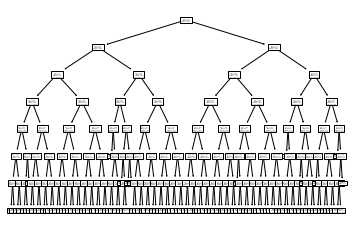

In [36]:
tree.plot_tree(clf);

## Tweaking Tree Depth to Adjust AUC

In [37]:
# The first decision tree model we trained and tested
clf = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_split=100)
clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(test["high_income"], predictions)

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train["high_income"], train_predictions)

print(test_auc)
print(train_auc)

0.6553138481876499
0.6624508042161483


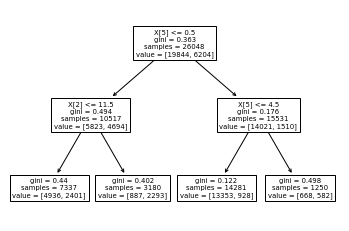

In [38]:
tree.plot_tree(clf);

## Underfitting in Simplistic Trees

In [39]:
income['high_income'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: high_income, dtype: float64

|                     settings                    | train AUC | test AUC |
|:-----------------------------------------------:|:---------:|:--------:|
| default (min_samples_split: 2, max_depth: None) | 0.947     | 0.694    |
| min_samples_split: 13                           | 0.843     | 0.700    |
| min_samples_split: 13, max_depth: 7             | 0.748     | 0.7744   |
| min_samples_split: 100, max_depth: 2            | 0.662     | 0.655    |

## Exploring Decision Tree Variance

In [40]:
numpy.random.seed(1)

# Generate a column containing random numbers from 0 to 4
income["noise"] = numpy.random.randint(4, size=income.shape[0])

# Adjust "columns" to include the noise column
columns = ["noise", "age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

# Make new train and test sets
train_max_row = math.floor(income.shape[0] * .8)
train = income.iloc[:train_max_row]
test = income.iloc[train_max_row:]

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=1)

clf.fit(train[columns], train["high_income"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(test["high_income"], predictions)

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train["high_income"], train_predictions)

print(test_auc)
print(train_auc)

0.6914060013941348
0.9750761614350801


## Knowing When to Use Decision Trees

Let's go over the main advantages and disadvantages of using decision trees. The main advantages of using decision trees is that they're:

Easy to interpret
* Relatively fast to fit and make predictions
* Able to handle multiple types of data
* Able to pick up nonlinearities in data, and usually fairly accurate
* The main disadvantage of using decision trees is their tendency to overfit.

Decision trees are a good choice for tasks where it's important to be able to interpret and convey why the algorithm is doing what it's doing.

The most powerful way to reduce decision tree overfitting is to create ensembles of trees. The random forest algorithm is a popular choice for doing this. In cases where prediction accuracy is the most important consideration, random forests usually perform better.

In the next mission, we'll explore the random forest algorithm in greater depth.